## Goal: Predict median house value 

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import urllib.request

### Import Dataset

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = 'housing.csv'
urllib.request.urlretrieve(url, filename)

('housing.csv', <http.client.HTTPMessage at 0x18653699e80>)

In [69]:
df = pd.read_csv('housing.csv')

### Exploratory Data Analysis

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Overview of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

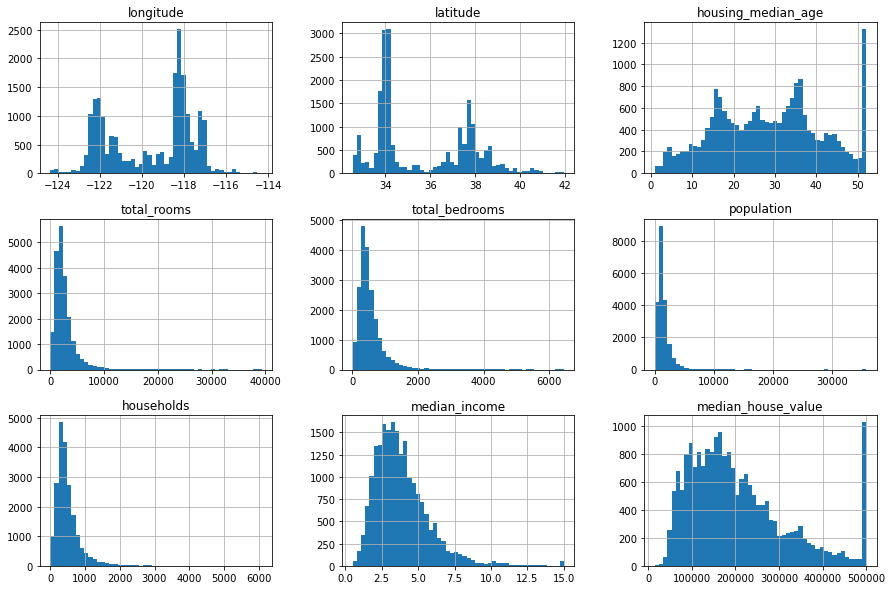

In [8]:
#Distribution of the dataset

df.hist(bins=50, figsize=(15, 10))

### Features

For the rest of the homework, we will need to use only these columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [70]:
df = df.drop(columns=["ocean_proximity"])
df_init = df.copy()
display(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

##### Question 1
Find a feature with missing values. How many missing values does it have?

In [15]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [19]:
missing_values = df.isna().sum().sum()
print(f"\n number of missing values: {missing_values}")


 number of missing values: 207


### Question 2

What's the median (50% percentile) for variable 'population'?

In [22]:
median_in_population = df.population.median()
print(f"\n Question 2: {median_in_population}")



 Question 2: 1166.0


### Rearrange data by shuffling

###### Shuffle the initial dataset, use seed 42.

###### Split your data in train/val/test sets, with 60%/20%/20% distribution.

###### Make sure that the target value ('median_house_value') is not in your dataframe.

###### Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [24]:
# shuffle

n = len(df)
n

#idx = np.arange(n)

#np.random.seed(42) 
#np.random.shuffle(idx) 

20640

In [27]:
index = np.arange(n)
index

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [47]:
np.random.seed(42)
np.random.shuffle(index)


In [48]:
index

array([  642, 12613,  9500, ...,   982,  3828,  8266])

In [54]:
df["index"] = index

df = df.sort_values(by="index", ascending=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,index
17643,-121.90,37.27,28.0,4538.0,685.0,1996.0,667.0,5.4609,263600.0,0
12996,-121.25,38.68,15.0,1497.0,243.0,730.0,242.0,4.9688,135600.0,1
4681,-118.34,34.08,52.0,2756.0,542.0,971.0,510.0,5.5871,500001.0,2
10752,-117.89,33.61,42.0,1301.0,280.0,539.0,249.0,5.0000,500001.0,3
12048,-117.50,33.87,4.0,6755.0,1017.0,2866.0,850.0,5.0493,239800.0,4


In [55]:
df = df.drop(columns=["index"])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17643,-121.90,37.27,28.0,4538.0,685.0,1996.0,667.0,5.4609,263600.0
12996,-121.25,38.68,15.0,1497.0,243.0,730.0,242.0,4.9688,135600.0
4681,-118.34,34.08,52.0,2756.0,542.0,971.0,510.0,5.5871,500001.0
10752,-117.89,33.61,42.0,1301.0,280.0,539.0,249.0,5.0000,500001.0
12048,-117.50,33.87,4.0,6755.0,1017.0,2866.0,850.0,5.0493,239800.0


In [56]:
# splitting the data into training, validation and test sets:
n = len(df)
val = int(0.2 * n)
test = int(0.2 * n)
train = int(0.6 * n)
df_train = df.iloc[:train]
df_val = df.iloc[train : train + val]
df_test = df.iloc[train + val :]

In [58]:
display(len(df_train))
display(len(df_test))
display(len(df_val))

12384

4128

4128

In [59]:
#Remove target from dataframe

df_train_f = df_train.drop(columns=["median_house_value"])
df_val_f = df_val.drop(columns=["median_house_value"])
df_testf_f = df_test.drop(columns=["median_house_value"])

In [60]:
# log1p transformation of the target variable :

y_train = np.log1p(np.array(df_train.median_house_value.values))
y_val = np.log1p(np.array(df_val.median_house_value.values))
y_test = np.log1p(np.array(df_test.median_house_value.values))

array([[<AxesSubplot:title={'center':'y_training'}>]], dtype=object)

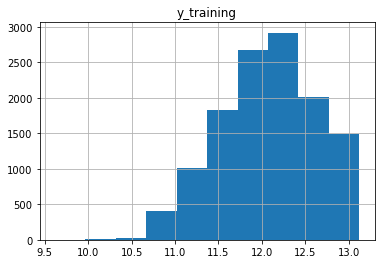

In [64]:
y_train_df = pd.DataFrame(y_train,columns=['y_training'])
y_train_df.hist()

### Question 3
##### We need to deal with missing values for the column from Q1.
##### We have two options: fill it with 0 or with the mean of this variable.
##### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
##### For computing the mean, use the training only!
##### Use the validation dataset to evaluate the models and compare the RMSE of each option.
##### Round the RMSE scores to 2 decimal digits using round(score, 2)
##### Which option gives better RMSE?

In [65]:
def prepare_X_null(df):
    #  function to prepare dataset with 0
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X


def prepare_X_mean(df):
    # function to prepare dataset with mean
    df = df.copy()
    mean = df.total_bedrooms.mean()
    df.total_bedrooms = df.total_bedrooms.fillna(mean)
    X = df.values
    return X


def prepare_X_median(df):
    # function to prepare dataset with median
    df = df.copy()
    median = df.total_bedrooms.median()
    df.total_bedrooms = df.total_bedrooms.fillna(median)
    X = df.values
    return X

In [66]:
def train_linear_regression(x_train, y_train):
    # function to train the Linear Regression model
    ones = np.ones(x_train.shape[0])
    x_train = np.column_stack([ones, x_train])

    XTX = x_train.T.dot(x_train)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(x_train.T).dot(y_train)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w


def predict_linear_regression(x_val, w0, w_array):
    # function for marking predictions:
    y_pred = w0 + x_val.dot(w_array)
    return y_pred


def rmse(y_pred, y_val):
    # function to calculate RMSE:
    SE = (y_pred - y_val) ** 2
    MSE = SE.mean()
    RMSE = np.sqrt(MSE)
    return RMSE


x_train_0 = prepare_X_null(df_train_f)
x_train_mean = prepare_X_mean(df_train_f)
x_train_median = prepare_X_median(df_train_f)


x_null_val = prepare_X_null(df_val_f)
x_mean_val = prepare_X_mean(df_val_f)
x_median_val = prepare_X_median(df_val_f)


w0_null, w_null = train_linear_regression(x_train_0, y_train)
w0_mean, w_mean = train_linear_regression(x_train_mean, y_train)
w0_median, w_median = train_linear_regression(x_train_median, y_train)


y_null_pred = predict_linear_regression(x_null_val, w0_null, w_null)
y_mean_pred = predict_linear_regression(x_mean_val, w0_mean, w_mean)
y_median_pred = predict_linear_regression(x_median_val, w0_median, w_median)


rmse_option_null = rmse(y_null_pred, y_val)
rmse_option_mean = rmse(y_mean_pred, y_val)
rmse_option_median = rmse(y_median_pred, y_val)


print(f"RMSE score for option_null = {round(rmse_option_null, 2)}")
print(f"RMSE score for option_mean = {round(rmse_option_mean, 2)}")
print(f"RMSE score for option_median = {round(rmse_option_median, 2)}")



RMSE score for option_null = 0.35
RMSE score for option_mean = 0.35
RMSE score for option_median = 0.35


### Question 4
###### Now let's train a regularized linear regression.
###### For this question, fill the NAs with 0.
###### Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
###### Use RMSE to evaluate the model on the validation dataset.
###### Round the RMSE scores to 2 decimal digits.
###### Which r gives the best RMSE?

In [67]:
def train_linear_regression_reg(x_train, y_train, r=0):
    # function for Linear Regression model training with Regularization
    ones = np.ones(x_train.shape[0])
    x_train = np.column_stack([ones, x_train])

    XTX = x_train.T.dot(x_train)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(x_train.T).dot(y_train)

    w0 = w_full[0]
    w = w_full[1:]

    return w0, w


r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

x_train = prepare_X_null(df_train_f)
x_val = prepare_X_null(df_val_f)

for r in r_list:

    w0, w = train_linear_regression_reg(x_train, y_train, r=r)
    y_pred = predict_linear_regression(x_val, w0, w)

    rmse_score = rmse(y_val, y_pred)
    print(f"For r = {r:>7} RMSE_score = {round(rmse_score, 2)}")

For r =       0 RMSE_score = 0.35
For r =   1e-06 RMSE_score = 0.35
For r =  0.0001 RMSE_score = 0.35
For r =   0.001 RMSE_score = 0.35
For r =    0.01 RMSE_score = 0.35
For r =     0.1 RMSE_score = 0.35
For r =       1 RMSE_score = 0.35
For r =       5 RMSE_score = 0.36
For r =      10 RMSE_score = 0.36


### Question 5
###### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
###### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
###### For each seed, do the train/validation/test split with 60%/20%/20% distribution.
###### Fill the missing values with 0 and train a model without regularization.
###### For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
###### What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
###### Round the result to 3 decimal digits (round(std, 3))

In [71]:
def rmse_random_seed(df, random_seed):

    df = df.copy()
    n = len(df)
    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df["idx"] = idx
    df = df.sort_values(by="idx", ascending=True)
    df = df.drop(columns=["idx"])
    df = df.reset_index(drop=True)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train : n_train + n_val]
    df_test = df.iloc[n_train + n_val :]

    y_train = np.log1p(np.array(df_train.median_house_value.values))
    y_val = np.log1p(np.array(df_val.median_house_value.values))

    df_train_f = df_train.drop(columns=["median_house_value"])
    df_val_f = df_val.drop(columns=["median_house_value"])

    x_train = prepare_X_null(df_train_f)
    w0, w = train_linear_regression(x_train, y_train)
    
    x_val = prepare_X_null(df_val_f)
    y_pred = predict_linear_regression(x_val, w0, w)
    
    rmse_score = rmse(y_pred, y_val)
    return rmse_score


rmse_scores_list = []
s = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in s:
    rmse_score = rmse_random_seed(df_init, seed)
    rmse_scores_list.append(rmse_score)

    print(f"For Seed = {seed}, RMSE = {rmse_score}")

For Seed = 0, RMSE = 0.3365724771959996
For Seed = 1, RMSE = 0.3384915167196613
For Seed = 2, RMSE = 0.3418221508283065
For Seed = 3, RMSE = 0.339440454555
For Seed = 4, RMSE = 0.3361200800899308
For Seed = 5, RMSE = 0.33923763557704995
For Seed = 6, RMSE = 0.35189733420140745
For Seed = 7, RMSE = 0.3486368768386161
For Seed = 8, RMSE = 0.34355356916904
For Seed = 9, RMSE = 0.3384608743807607


In [73]:
# calculating the standard deviation of rmse results for different data splits:

standard_deviation = round(np.std(rmse_scores_list), 3)
standard_deviation

0.005

### Question 6
###### Split the dataset like previously, use seed 9.
###### Combine train and validation datasets.
###### Fill the missing values with 0 and train a model with r=0.001.
###### What's the RMSE on the test dataset?

In [74]:
df = df.copy()
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df["idx"] = idx
df = df.sort_values(by="idx", ascending=True)
df = df.drop(columns=["idx"])
df = df.reset_index(drop=True)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val :]


y_train = np.log1p(np.array(df_train.median_house_value.values))
y_val = np.log1p(np.array(df_val.median_house_value.values))
y_test = np.log1p(np.array(df_test.median_house_value.values))

df_train_f = df_train.drop(columns=["median_house_value"])
df_val_f = df_val.drop(columns=["median_house_value"])
df_test_f = df_test.drop(columns=["median_house_value"])


df_train_val = pd.concat([df_train_f, df_val_f])
y_train_val = np.concatenate([y_train, y_val])

x_train_val = prepare_X_null(df_train_val)
w0, w = train_linear_regression_reg(x_train_val, y_train_val, r=0.001)

x_test = prepare_X_null(df_test_f)
y_pred = predict_linear_regression(x_test, w0, w)

rmse_score = rmse(y_pred, y_test)
rmse_score

0.3400349372175485